# PyTesseract quickstart
This notebook is simply an annoted version of the quickstart guide on the [pytesseract page on PyPi](https://pypi.org/project/pytesseract/).

In [1]:
from PIL import Image
from IPython.display import display, IFrame
import pytesseract

In [2]:
# If you don't have tesseract executable in your PATH, include the following:
# pytesseract.pytesseract.tesseract_cmd = r'C:\Users\jamesl\AppData\Local\Tesseract-OCR\tesseract.exe'

## 1. Image to string

In [3]:
def show_im(image, display_width=500):
    w, h = image.size
    
    display_height = int((display_width/w)*h)
    display(image.resize((display_width, display_height)))

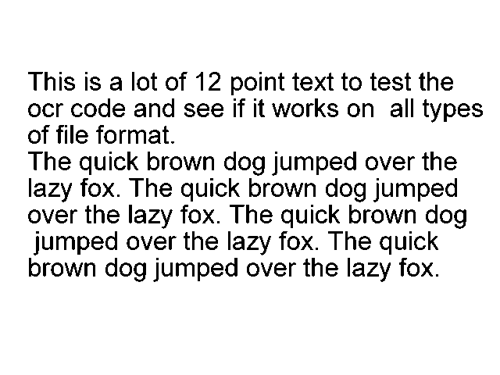

In [4]:
path = 'images/test.png'

im = Image.open(path)
show_im(im, 500)

In [5]:
print(pytesseract.image_to_string(im))

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


In order to bypass the image conversions of pytesseract, just use relative or absolute image path
> NOTE: In this case you should provide tesseract supported images or tesseract will return error

In [6]:
print(pytesseract.image_to_string(im))

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


## 2. Batch processing
Use a single text file containing the list of multiple image file paths

In [7]:
print(pytesseract.image_to_string('images/images.txt'))

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.

serchote1

Grosse Scheidegy
wt

Fuatte tilien

feos. ae
m Tow

Icone a t

mile a
a
a

or am
oo se
co an
or wa

Mneinaebtel

a
i

Toul : on - 54.50
bel. neenee sumon | as

Barat nbro  %8 ar
Eo sete Si: oute

ha nc an ane
teus om ss aris
acs om ase ar io

Eaalls euistsaelanatluein ch


## 3. Timeout/terminate the tesseract job after a period of time

In [8]:
try:
    print('Trying for 3 seconds...\n')
    print(pytesseract.image_to_string(im, timeout=3), '\n')
    print('Trying for 0.5 seconds...\n')
    print(pytesseract.image_to_string(im, timeout=.5), '\n')
except RuntimeError as timeout_error:
    # Tesseract processing is terminated
    print('Timed out before completing job :(')
    pass

Trying for 3 seconds...

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox. 

Trying for 0.5 seconds...

Timed out before completing job :(


## 4. Get coordinates of bounding boxes around characters

In [9]:
# Get bounding box estimates
print(pytesseract.image_to_boxes(im)[:72])

T 36 364 50 388 0
h 50 364 55 388 0
i 62 364 71 388 0
s 76 364 95 388 0



## 5. Get verbose data including boxes, confidences, line and page numbers

In [10]:
print(pytesseract.image_to_data(im)[:550])

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	640	480	-1	
2	1	1	0	0	0	36	92	582	269	-1	
3	1	1	1	0	0	36	92	582	92	-1	
4	1	1	1	1	0	36	92	544	30	-1	
5	1	1	1	1	1	36	92	60	24	96	This
5	1	1	1	1	2	109	92	20	24	96	is
5	1	1	1	1	3	141	98	15	18	96	a
5	1	1	1	1	4	169	92	32	24	95	lot
5	1	1	1	1	5	212	92	28	24	96	of
5	1	1	1	1	6	251	92	31	24	96	12
5	1	1	1	1	7	296	92	68	30	95	point
5	1	1	1	1	8	374	93	53	23	96	text
5	1	1	1	1	9	437	93	26	23	96	to
5	1	1	1	1	10	474	93	52	23	96	test
5	1	1	1	1	11	536	92	44	24	96	the


In [11]:
# Get information about orientation and script detection
print(pytesseract.image_to_osd(im))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 10.86
Script: Latin
Script confidence: 10.56


## 6. Saving as PDF or HOCR file

In [12]:
# Get a searchable PDF
pdf = pytesseract.image_to_pdf_or_hocr(path, extension='pdf')
with open('test.pdf', 'w+b') as f:
    f.write(pdf)  # pdf type is bytes by default

See [this thread](https://stackoverflow.com/questions/38361243/hocr-to-html-for-visualizing) outlining options for visualising HOCR files.

After saving the file below, add the following line just before the closing tag:
```html
<script src="https://unpkg.com/hocrjs"></script>
```

In [13]:
# Get HOCR output
hocr = pytesseract.image_to_pdf_or_hocr(path, extension='hocr')
with open('test_ocr.html', 'w+b') as f:
    # insert script just before closing tag
    hocr_out = hocr[:-8] + bytes('<script src="https://unpkg.com/hocrjs"></script>\n', 'utf-8') + hocr[-8:]
    f.write(hocr_out)

In [14]:
IFrame('test_ocr.html', width='100%', height='500px')

## 7. OpenCV

In [15]:
import cv2
from matplotlib import pyplot as plt

### Read image

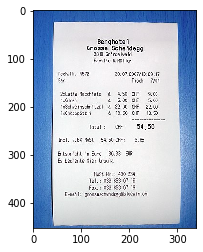

In [16]:
path = 'images/receipt.png'

im = cv2.imread(path)
plt.imshow(im)
plt.show()

In [17]:
print(pytesseract.image_to_string(im))

serchote1

Grosse Scheidegy
wt

Fuatte tilien

feos. ae
m Tow

aat Icone a t

mile a
a
a

or am
oo se
co an
or wa

Mneinaebtel

a
i

Toul : on - 54.50
bel. neenee sum on | as

Barat nbro  %8 ar
Eo selec Si: oute

ha nc an ane
teus om ss aris
acs om ase ar io

Eaalls euistsaelanatluein ch


### Change colour channel format

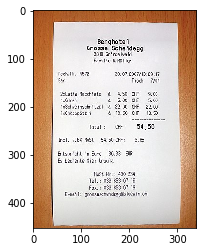

In [18]:
# By default OpenCV stores images in BGR format and since pytesseract (and matplotlib) assumes RGB format,
# we need to convert from BGR to RGB format/mode:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

### Apply threshold

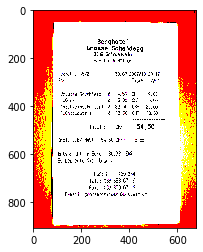

In [19]:
im = cv2.resize(im, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
retval, threshold = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
plt.imshow(threshold)

In [20]:
print(pytesseract.image_to_string(threshold))

Berahote 1
Grosse Scheidegg
3818 Grindelsald
Fam ie R. Hiller

Rech. tir, 4572 30. 07, 20077 13:29: 17
Tach - 7/01

Hacchiato - & 4.50 CHF - 9,00

a 5.00 Cf - 5.00

inschnitzel & 22.00 CF 22.00
IxChasspatz li a 18,50

Total : _ {HF
Incl. 7.6% HuSt - 56.50 CHF: 3.85

Entsnricht in Euro - 36.33 EUR
Es bediente Sig: Ursula

BuSt Nin. : 430 28
Tel.: 033 853 67 16
Fax. : 033 853 67 19
E-mail: ch


In [21]:
# Get verbose data including boxes, confidences, line and page numbers
print(pytesseract.image_to_data(threshold)[:550])

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	680	906	-1	
2	1	1	0	0	0	224	121	232	99	-1	
3	1	1	1	0	0	224	121	232	99	-1	
4	1	1	1	1	0	268	121	127	23	-1	
5	1	1	1	1	1	268	121	114	23	44	Berahote
5	1	1	1	1	2	389	122	6	20	92	1
4	1	1	1	2	0	224	148	232	28	-1	
5	1	1	1	2	1	224	148	85	20	92	Grosse
5	1	1	1	2	2	326	148	130	28	79	Scheidegg
4	1	1	1	3	0	253	175	156	17	-1	
5	1	1	1	3	1	253	175	38	17	93	3818
5	1	1	1	3	2	302	175	107	17	79	Grindelsald
4	1	1	1	4	0	253	202	155	18	-1	
5	1	1	1	4	1	253	202	35	16	4	Fam



In [22]:
# Get HOCR output
hocr = pytesseract.image_to_pdf_or_hocr(threshold, extension='hocr')
with open('receipt_hocr.html', 'w+b') as f:
    # insert script just before closing tag
    hocr_out = hocr[:-8] + bytes('<script src="https://unpkg.com/hocrjs"></script>\n', 'utf-8') + hocr[-8:]
    f.write(hocr_out)

In [23]:
IFrame('receipt_hocr.html', width='100%', height='500px')